## Eksik Veri Doldurma (Data Imputation)
- Eksik öznitelik değerler olan veri satırlarını (örneklerini) kullanma, onları sil. (oldukça kolay bir çözüm.)
- Eksik öznitelik değerlerini elle doldur. (Veri büyüdükçe ve eksik olan verinin önemine göre zaman alıcı ve etkin   olmayan bir yönteme dönüşebilir.)
- Eksik öznitelik değerler için global bir değişken kullan. (Null, bilinmiyor.)
- Eksik öznitelik değerlerini ortalama bir değer ile doldur.
- Aynı sınıfa ait kayıtların öznitelik değerlerinin ortalaması ile doldur.
- Olasılığı en fazla olan öznitelik değerleriyle doldur.
- Regresyon yöntemi ile sayısal eksik değerleri tahmin et ve doldur.

In [57]:
import pandas as pd
import numpy as np

sozluk = { 'İsim'   :pd.Series(['Ada', 'Cem', 'Sibel', 'Ahmet', 'Mehmet', 'Ali', 'Veli',
                             'Ayşe', 'Hüseyin', 'Necmi', 'Nalan', 'Namık']),
           'Meslek' :pd.Series(['işçi', 'işçi', 'memur', 'serbest', 'serbest', None, None,
                             'sigortacı', 'işsiz', None, None, 'memur']),
           
           'Tarih'  :pd.Series(['05.06.2024', '03.02.2023', '03.02.2023', '11.12.2020', '11.12.2020', None, None,
                           None, '03.02.2023', None, '11.12.2020', '11.12.2020']),
           'Yaş'    :pd.Series([21, 24, 25, 44, 31, 27, 35, 33, 42, 29, 41, 43]),
          
           'ÇocukSayısı'  :pd.Series([None, None, None, None, None, 1, 2, 0, None, None, None, None]),
          
           'Puan'   :pd.Series([89, 87, 77, 55, 70, 79, 73, 79, 54, 92, 61, 69])}

df=pd.DataFrame(sozluk)
df

,İsim,Meslek,Tarih,Yaş,ÇocukSayısı,Puan
0,Ada,işçi,05.06.2024,21,NaN,89
1,Cem,işçi,03.02.2023,24,NaN,87
2,Sibel,memur,03.02.2023,25,NaN,77
3,Ahmet,serbest,11.12.2020,44,NaN,55
4,Mehmet,serbest,11.12.2020,31,NaN,70
5,Ali,None,None,27,1.0,79
6,Veli,None,None,35,2.0,73
7,Ayşe,sigortacı,None,33,0.0,79
8,Hüseyin,işsiz,03.02.2023,42,NaN,54
9,Necmi,None,None,29,NaN,92


In [2]:
df.isnull().sum()
#özniteliklerin değer almadığı kaç satır var?

İsim           0
Meslek         4
Tarih          4
Yaş            0
ÇocukSayısı    9
Puan           0
dtype: int64

In [3]:
df.isnull().sum().sum()
#toplam kaç none değeri var?

17

In [5]:
len(df)

12

In [17]:
#her özniteliğin toplam eksik değer sayısı ve yüzdelik oranı
new_df = pd.DataFrame(df.isnull().sum())
new_df['% Değeri'] = (df.isnull().sum()*100/len(df))
new_df = new_df.rename( columns = {0: 'Eksik Değerler', 
                          1: '% Değeri'})
new_df

,Eksik Değerler,% Değeri
İsim,0,0.000000
Meslek,4,33.333333
Tarih,4,33.333333
Yaş,0,0.000000
ÇocukSayısı,9,75.000000
Puan,0,0.000000


In [5]:
#her özniteliğin toplam eksik değer sayısı ve yüzdelik oranı, fonksiyon kullanarak 2. yolu
def eksik_deger_tablosu(df):
    eksik_deger = df.isnull().sum()
    eksik_deger_yuzde = 100*df.isnull().sum()/len(df)
    eksik_deger_tablo = pd.concat([eksik_deger, eksik_deger_yuzde], axis=1)
    eksik_deger_tablo = eksik_deger_tablo.rename(columns = {0: 'Eksik Değerler', 
                          1: '% Değeri'})
    return eksik_deger_tablo
eksik_deger_tablosu(df)

,Eksik Değerler,% Değeri
İsim,0,0.000000
Meslek,4,33.333333
Tarih,4,33.333333
Yaş,0,0.000000
ÇocukSayısı,9,75.000000
Puan,0,0.000000


In [7]:
tr = len(df) *.3
df.dropna(thresh = tr, axis=1, inplace = True)
df
#%30'dan fazlası NaN değerli olan öznitelikleri sildik. Axis=1 i sütun bazlı silsin diye yazdık, inplace=True ifadesini de kalıcı olması için yazdık.
#Axis 0 deseydik bu sefer de satır bazında %30'dan fazla eksik değer olan satırları silecekti, mesela 9. satır

,İsim,Meslek,Tarih,Yaş,Puan
0,Ada,işçi,05.06.2024,21,89
1,Cem,işçi,03.02.2023,24,87
2,Sibel,memur,03.02.2023,25,77
3,Ahmet,serbest,11.12.2020,44,55
4,Mehmet,serbest,11.12.2020,31,70
5,Ali,None,None,27,79
6,Veli,None,None,35,73
7,Ayşe,sigortacı,None,33,79
8,Hüseyin,işsiz,03.02.2023,42,54
9,Necmi,None,None,29,92


In [8]:
#null değerleri Diğer ile doldur
df['Meslek'] = df['Meslek'].fillna('Diğer')
df

,İsim,Meslek,Tarih,Yaş,Puan
0,Ada,işçi,05.06.2024,21,89
1,Cem,işçi,03.02.2023,24,87
2,Sibel,memur,03.02.2023,25,77
3,Ahmet,serbest,11.12.2020,44,55
4,Mehmet,serbest,11.12.2020,31,70
5,Ali,Diğer,None,27,79
6,Veli,Diğer,None,35,73
7,Ayşe,sigortacı,None,33,79
8,Hüseyin,işsiz,03.02.2023,42,54
9,Necmi,Diğer,None,29,92


In [9]:
#tüm farklı tarih değerleri yani benzersiz değerler
df['Tarih'].unique() 

array(['05.06.2024', '03.02.2023', '11.12.2020', None], dtype=object)

In [10]:
#Tarih özniteliğindeki Null değerleri benzersiz değerlerden ilkiyle doldurma
print(df['Tarih'].unique()[0])
df['Tarih'] = df['Tarih'].fillna(df['Tarih'].unique()[0])
df

05.06.2024


,İsim,Meslek,Tarih,Yaş,Puan
0,Ada,işçi,05.06.2024,21,89
1,Cem,işçi,03.02.2023,24,87
2,Sibel,memur,03.02.2023,25,77
3,Ahmet,serbest,11.12.2020,44,55
4,Mehmet,serbest,11.12.2020,31,70
5,Ali,Diğer,05.06.2024,27,79
6,Veli,Diğer,05.06.2024,35,73
7,Ayşe,sigortacı,05.06.2024,33,79
8,Hüseyin,işsiz,03.02.2023,42,54
9,Necmi,Diğer,05.06.2024,29,92


In [11]:
df['Geçti'] = df['Puan'] > 70
df

,İsim,Meslek,Tarih,Yaş,Puan,Geçti
0,Ada,işçi,05.06.2024,21,89,True
1,Cem,işçi,03.02.2023,24,87,True
2,Sibel,memur,03.02.2023,25,77,True
3,Ahmet,serbest,11.12.2020,44,55,False
4,Mehmet,serbest,11.12.2020,31,70,False
5,Ali,Diğer,05.06.2024,27,79,True
6,Veli,Diğer,05.06.2024,35,73,True
7,Ayşe,sigortacı,05.06.2024,33,79,True
8,Hüseyin,işsiz,03.02.2023,42,54,False
9,Necmi,Diğer,05.06.2024,29,92,True


In [12]:
#üst bloktaki kodun fonksiyonlu hali
def basari_durumu(puan):
    return (puan>=70)

df['Geçti'] = df['Puan'].apply(basari_durumu)
df

,İsim,Meslek,Tarih,Yaş,Puan,Geçti
0,Ada,işçi,05.06.2024,21,89,True
1,Cem,işçi,03.02.2023,24,87,True
2,Sibel,memur,03.02.2023,25,77,True
3,Ahmet,serbest,11.12.2020,44,55,False
4,Mehmet,serbest,11.12.2020,31,70,True
5,Ali,Diğer,05.06.2024,27,79,True
6,Veli,Diğer,05.06.2024,35,73,True
7,Ayşe,sigortacı,05.06.2024,33,79,True
8,Hüseyin,işsiz,03.02.2023,42,54,False
9,Necmi,Diğer,05.06.2024,29,92,True


In [13]:
#Tarih değerlerinde nokta yerine - yazmak ve Yıl özniteliği eklemek
df['Tarih'] = pd.to_datetime(df['Tarih'])
df['Yıl'] = df['Tarih'].dt.year
df

,İsim,Meslek,Tarih,Yaş,Puan,Geçti,Yıl
0,Ada,işçi,2024-05-06,21,89,True,2024
1,Cem,işçi,2023-03-02,24,87,True,2023
2,Sibel,memur,2023-03-02,25,77,True,2023
3,Ahmet,serbest,2020-11-12,44,55,False,2020
4,Mehmet,serbest,2020-11-12,31,70,True,2020
5,Ali,Diğer,2024-05-06,27,79,True,2024
6,Veli,Diğer,2024-05-06,35,73,True,2024
7,Ayşe,sigortacı,2024-05-06,33,79,True,2024
8,Hüseyin,işsiz,2023-03-02,42,54,False,2023
9,Necmi,Diğer,2024-05-06,29,92,True,2024


In [31]:
#Gün özniteliği eklemek
#df['Tarih'] = pd.to_datetime(df['Tarih'])
df['Gün'] = df['Tarih'].dt.day
df

,İsim,Meslek,Tarih,Yaş,ÇocukSayısı,Puan,Gün
0,Ada,işçi,2024-05-06,21,NaN,89,6.0
1,Cem,işçi,2023-03-02,24,NaN,87,2.0
2,Sibel,memur,2023-03-02,25,NaN,77,2.0
3,Ahmet,serbest,2020-11-12,44,NaN,55,12.0
4,Mehmet,serbest,2020-11-12,31,NaN,70,12.0
5,Ali,None,NaT,27,1.0,79,NaN
6,Veli,None,NaT,35,2.0,73,NaN
7,Ayşe,sigortacı,NaT,33,0.0,79,NaN
8,Hüseyin,işsiz,2023-03-02,42,NaN,54,2.0
9,Necmi,None,NaT,29,NaN,92,NaN


In [16]:
#label encoding ile mesleklere sayı değerleri atayalım. fit_transform kullanarak yapılır.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Geçti'] = label_encoder.fit_transform(df['Geçti'])
df['Meslek'] = label_encoder.fit_transform(df['Meslek'])
df

,İsim,Meslek,Tarih,Yaş,Puan,Geçti,Yıl,Gün
0,Ada,2,2024-05-06,21,89,1,2024,6
1,Cem,2,2023-03-02,24,87,1,2023,2
2,Sibel,3,2023-03-02,25,77,1,2023,2
3,Ahmet,4,2020-11-12,44,55,0,2020,12
4,Mehmet,4,2020-11-12,31,70,1,2020,12
5,Ali,0,2024-05-06,27,79,1,2024,6
6,Veli,0,2024-05-06,35,73,1,2024,6
7,Ayşe,5,2024-05-06,33,79,1,2024,6
8,Hüseyin,1,2023-03-02,42,54,0,2023,2
9,Necmi,0,2024-05-06,29,92,1,2024,6


In [51]:
# Tek köşeli parantez: Series döner
x = df['Puan']  # Bu bir pandas Series'tir.
x

0     89
1     87
2     77
3     55
4     70
5     79
6     73
7     79
8     54
9     92
10    61
11    69
Name: Puan, dtype: int64

In [53]:
# Çift köşeli parantez: DataFrame döner
x = df[['Puan']]  # Bu bir pandas DataFrame'dir.
x

,Puan
0,89
1,87
2,77
3,55
4,70
5,79
6,73
7,79
8,54
9,92


In [17]:
from sklearn import preprocessing

#Puanların scale edilmiş halini (ölçeklendirilmiş) gösteren bir Puan2 özniteliği oluşturalım
x = df[['Puan']].values.astype(float) #scale edebilmek için floata çevir

#ölçeklendirme için minmaxscaler fonksiyonunu kullanıyoruz
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['Puan2'] = pd.DataFrame(x_scaled)

df

,İsim,Meslek,Tarih,Yaş,Puan,Geçti,Yıl,Gün,Puan2
0,Ada,2,2024-05-06,21,89,1,2024,6,0.921053
1,Cem,2,2023-03-02,24,87,1,2023,2,0.868421
2,Sibel,3,2023-03-02,25,77,1,2023,2,0.605263
3,Ahmet,4,2020-11-12,44,55,0,2020,12,0.026316
4,Mehmet,4,2020-11-12,31,70,1,2020,12,0.421053
5,Ali,0,2024-05-06,27,79,1,2024,6,0.657895
6,Veli,0,2024-05-06,35,73,1,2024,6,0.500000
7,Ayşe,5,2024-05-06,33,79,1,2024,6,0.657895
8,Hüseyin,1,2023-03-02,42,54,0,2023,2,0.000000
9,Necmi,0,2024-05-06,29,92,1,2024,6,1.000000


In [61]:
"""x = df[['Puan']].values.astype(float) #scale edebilmek için floata çevir

#ölçeklendirme için standardscaler fonksiyonunu kullanıyoruz
std_scaler = preprocessing.StandardScaler()
x_scaled = std_scaler.fit_transform(x)
df['Puan3'] = pd.DataFrame(x_scaled)
df
"""
#2. yol
x = df[['Puan']].values.astype(float)
std_scaler = preprocessing.StandardScaler()
df['Puan3'] = std_scaler.fit_transform(x)
df


,İsim,Meslek,Tarih,Yaş,ÇocukSayısı,Puan,Puan3
0,Ada,işçi,05.06.2024,21,NaN,89,1.263452
1,Cem,işçi,03.02.2023,24,NaN,87,1.097753
2,Sibel,memur,03.02.2023,25,NaN,77,0.269260
3,Ahmet,serbest,11.12.2020,44,NaN,55,-1.553424
4,Mehmet,serbest,11.12.2020,31,NaN,70,-0.310685
5,Ali,None,None,27,1.0,79,0.434959
6,Veli,None,None,35,2.0,73,-0.062137
7,Ayşe,sigortacı,None,33,0.0,79,0.434959
8,Hüseyin,işsiz,03.02.2023,42,NaN,54,-1.636274
9,Necmi,None,None,29,NaN,92,1.512000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

['setosa' 'versicolor' 'virginica']


In [ ]:
#datasets.load_iris() komutu, Iris veri setini bir Bunch veri yapısında yükler.
#Bunch, Python'daki bir sözlüğe (dictionary) benzer ve farklı bileşenleri (data, target, target_names, vs.) içerir.
#Bu yüzden aşağıdaki gibi bileşenleri ayıklayıp ayrı değişkenlere atamak genellikle gereklidir:


iris = datasets.load_iris()
X = iris.data
y=iris.target
class_names = iris.target_names
print(class_names

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [9]:
classifier = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [11]:
np.set_printoptions(precision=2)
#sayısal değerlerin virgülden sonra 2 basamak olacak şekilde yuvarlanmasını sağlar.

In [13]:
y_pred = classifier.predict(X_test)

In [15]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 15]])

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

<Figure size 800x600 with 0 Axes>

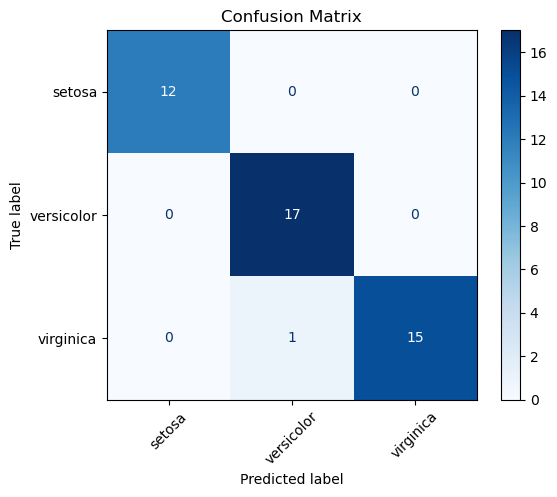

In [19]:
#confusion matrix özellikleri belirleme
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()